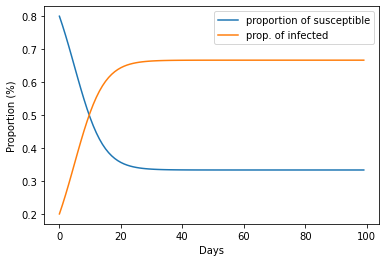

In [1]:
# Aggregate SIS Model 
# Susceptible, Infected, Susceptible

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# --- Define parameters ---

probTrans = 0.3 #prob. of transmitting virus from infected (beta)
probRecover = 0.1 #prob. of recovery (gamma) 
numDays = 100

# --- Setup the environment ---
# Initial state 
propS = 0.8
propI = 1-propS 

# function to update the state 
def update_prop(propSold, propIold):
    diffPropS = -probTrans*propIold*propSold + probRecover*propIold
    diffPropI = probTrans*propIold*propSold - probRecover*propIold
    propSnew = propSold + diffPropS
    propInew = propIold + diffPropI
    return propSnew, propInew

# Run the simulation
histPropS = []
histPropI = []
histPropS.append(propS)
histPropI.append(propI)

for day in range(numDays-1):
    propS,propI = update_prop(propS, propI)
    histPropS.append(propS)
    histPropI.append(propI)

plt.plot(histPropS, label='proportion of susceptible')
plt.plot(histPropI, label='prop. of infected')
plt.legend()
plt.xlabel('Days')
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

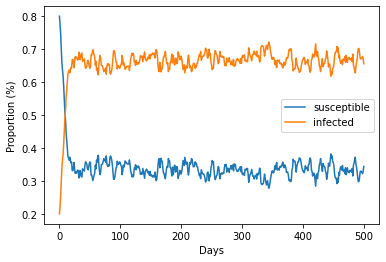

In [2]:
# ==== Agent-based approach SIR ==== #

import random
import matplotlib.pyplot as plt

## Define parameters

probTrans = 0.3
probRecover = 0.1
initNmS = 8*100
initNmI = 2*100
numDays = 500

## Define Agent class

class Agent():
    # Constructor
    def __init__(self, health='S'):
        self.health=health #by default, he is subseceptible
    # A method to update an agent's health
    def health_update(self):
        if self.health == 'S':
            opponent = random.choice(listAllAgents) #randomly meet another agent
            if opponent.health == 'I': #if opponent is infected
                if random.uniform(0,1) < probTrans: 
                    self.health = 'I' #get infected
        elif self.health == 'I':
            if random.uniform(0,1) < probRecover:
                self.health = 'S' #get recovered

## Prepare some other functions

### Generate a list of agents' health from the list of agents
def list_healths(listAgents):
    return([agent.health for agent in listAgents])

### Calculate the proportion of each health from a list of agents
def count_prop(listAgents):
    listHealth = list_healths(listAgents)
    return listHealth.count('S')/len(listAgents), listHealth.count('I')/len(listAgents)

## Initial state 
listAllAgents = [Agent('S') for i in range(initNmS)] + [Agent('I') for i in range(initNmI)]
histPropS = []
histPropI = []

propS, propI = count_prop(listAllAgents)
histPropS.append(propS)
histPropI.append(propI)

## Run simulation
for day in range(numDays):
    for agent in listAllAgents:
        agent.health_update()
    propS, propI = count_prop(listAllAgents)
    histPropS.append(propS)
    histPropI.append(propI)

plt.plot(histPropS, label='susceptible')
plt.plot(histPropI, label='infected')
plt.legend()
plt.xlabel('Days')
plt.ylabel("Proportion (%)")
plt.show()

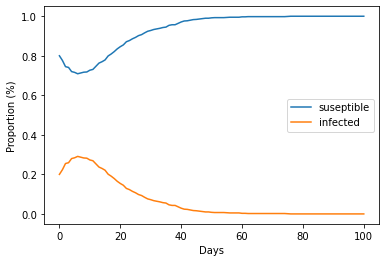

In [3]:
# ==== Agent-based with Quarantine SIQ ==== #

import random
import matplotlib.pyplot as plt

## Define parameters

probTrans = 0.3
probRecover = 0.1
initNmS = 8*100
initNmI = 2*100
numDays = 100
capQ = 250 #The capacity of the Quarantine facilities

## Define Agent class

class Agent():
    # Constructor
    def __init__(self, health='S'):
        self.health = health #by default, he is susceptible
        self.loc = 'T' #location is either in town (T, not quarantined) or Q (quarantined)
    # A method to update an agent's health
    def health_update(self):
        if self.health == 'S': #if currently susceptible
            opponent = random.choice([agent for agent in listAllAgents if agent.loc == 'T']) #randomly meet another agent in town-not quarantined
            if opponent.health == 'I': #if opponent is infected
                if random.uniform(0,1) < probTrans: 
                    self.health = 'I' #get infected
                    if len([agent for agent in listAllAgents if agent.loc == 'Q']) < capQ: #if there is room to be quarantined
                        self.loc = 'Q' #get quarantined
                    else:
                        self.loc = 'T'
        elif self.health == 'I':
            if random.uniform(0,1) < probRecover:
                self.health = 'S' #get recovered
                self.loc = 'T' #return to town

## Prepare some other functions

### Generate a list of agents' health from the list of agents
def list_healths(listAgents):
    return([agent.health for agent in listAgents])

### Calculate the proportion of each health from a list of agents
def count_prop(listAgents):
    listHealth = list_healths(listAgents)
    return listHealth.count('S')/len(listAgents), listHealth.count('I')/len(listAgents)

## Initial state
listAllAgents = [Agent('S') for i in range(initNmS)] + [Agent('I') for i in range(initNmI)]
histPropS = []
histPropI = []

propS, propI = count_prop(listAllAgents)
histPropS.append(propS)
histPropI.append(propI)

## Run simulation
for day in range(numDays):
    for agent in listAllAgents:
        agent.health_update()
    propS, propI = count_prop(listAllAgents)
    histPropS.append(propS)
    histPropI.append(propI)

plt.plot(histPropS, label='suseptible')
plt.plot(histPropI, label='infected')
plt.legend()
plt.xlabel('Days')
plt.ylabel("Proportion (%)")
plt.show()